# Animals CNN
## Machine Learning Final Project

---

Author: James Austin Jr.

Repo: https://github.com/bobdidley/456-Machine-Learning

Source: https://www.kaggle.com/datasets/alessiocorrado99/animals10?resource=download

### Import Libraries

In [ ]:
import tensorflow as tf # Used for preparing model
from tensorflow import keras # Used for preparing dataset and model
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt # Used for plotting diagrams
from PIL import Image, ImageOps, UnidentifiedImageError # Used for image modification
import os # Used for reading directory

In [24]:
# !unzip /archive.zip # Code for Google Colab to unzip & extract the zip file to then be read from in that environment

Streaming output truncated to the last 5000 lines.
  inflating: archive/raw-img/scoiattolo/OIP-TvOAcQz_YUs_i6JjPxvGOQHaE8.jpeg  
  inflating: __MACOSX/archive/raw-img/scoiattolo/._OIP-TvOAcQz_YUs_i6JjPxvGOQHaE8.jpeg  
  inflating: archive/raw-img/scoiattolo/OIP-f_tIXmwqyOYdSTQTsYaxnwHaE7.jpeg  
  inflating: __MACOSX/archive/raw-img/scoiattolo/._OIP-f_tIXmwqyOYdSTQTsYaxnwHaE7.jpeg  
  inflating: archive/raw-img/scoiattolo/OIP-fq4f4c8nMUFl9J0J9XBNSAHaFj.jpeg  
  inflating: __MACOSX/archive/raw-img/scoiattolo/._OIP-fq4f4c8nMUFl9J0J9XBNSAHaFj.jpeg  
  inflating: archive/raw-img/scoiattolo/OIP-vwx9bSm37ihiVWqQUB3cyQHaEo.jpeg  
  inflating: __MACOSX/archive/raw-img/scoiattolo/._OIP-vwx9bSm37ihiVWqQUB3cyQHaEo.jpeg  
  inflating: archive/raw-img/scoiattolo/OIP-NJ9pzTUqMLcwj-aAx4Ke4wAAAA.jpeg  
  inflating: __MACOSX/archive/raw-img/scoiattolo/._OIP-NJ9pzTUqMLcwj-aAx4Ke4wAAAA.jpeg  
  inflating: archive/raw-img/scoiattolo/OIP-6uBuLoN_VRsIyYBUuT7SYQHaE7.jpeg  
  inflating: __MACOSX/archive/raw-im

### Image Data Preprocessing

In [26]:
classes = ["cane", "cavallo", "elefante", "farfalla", "gallina", "gatto", "mucca", "pecora", "ragno", "scoiattolo"]
max_img_size = (256, 256)
dir_path = '/content/archive/raw-img'
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        path = os.path.join(dirname, filename)
        image = Image.open(path)
        if image.size == max_img_size:
            continue
        # Resize smallest dimension to 256 or 128
        image.resize(max_img_size)
        scale = 0.875 # 256 -> 224 or 128 -> 112
        
        # Crop center 
        w1 = image.size[0] - (image.size[0] * scale)
        w2 = image.size[0] * scale
        h1 = image.size[1] - (image.size[1] * scale)
        h2 = image.size[1] * scale
        crop_img = image.crop((w1,h1,w2,h2))
        crop_img.save(path)
        

        

### Prepare Data Set

In [27]:
# 
dataset = tf.keras.preprocessing.image_dataset_from_directory(
            dir_path,
            labels="inferred", # default
            label_mode="categorical",
            class_names=classes,
            color_mode="rgb", # default
            batch_size=32, # default
            image_size=max_img_size
        )

# Create data set sizes
whole_size = len(dataset)
train_size = round(whole_size * 0.8)
test_size = whole_size - train_size
val_size = round(train_size * 0.3)

# Split data set sizes
train_data = dataset.take(train_size)
test_data = dataset.take(test_size)
val_data = train_data.take(val_size)

# Print sizes
print(whole_size -len(train_data) - len(test_data))
# print(train_size - len(train_data) - len(val_data))
print(len(train_data))
print(len(test_data))
print(len(val_data))

Found 26179 files belonging to 10 classes.
0
-196
655
164
196


### Prepare Model

In [29]:
model = tf.keras.models.Sequential()
# model.add(keras.layers.ZeroPadding2D(padding=(2, 2))) # Used for padding b/c there was an error
tf.keras.Input(shape=(224, 224, 3))
tf.keras.layers.Rescaling(1./255)

# Layer 1
model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=7, activation="relu", strides=2, padding = "same", input_shape=[256, 256, 3])) #Convolution 1
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Layer 2
model.add(keras.layers.ZeroPadding2D(padding=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=192, kernel_size=5, activation="relu", padding = "valid")) #Convolution 2
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))

# Layer 3
model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation="relu", padding = "same")) #Convolution 3

# Layer 4
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 4

# Layer 5
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 5
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(6,6)))

# Layer 6: Fully Connected
model.add(tf.keras.layers.Dense(units=4096, activation="relu"))#Full Connection1
tf.keras.layers.Dropout(0.5)
tf.keras.layers.Dropout(0.5)

# Layer 7: Fully Connected
model.add(tf.keras.layers.Dense(units=4096, activation="relu"))#Full Connection2
tf.keras.layers.Dropout(0.5)

# Output
model.add(tf.keras.layers.Flatten()) #Flatenning to desired output size
model.add(tf.keras.layers.Dense(units= 10, activation= "softmax"))#Output layer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 96)      14208     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 96)       0         
 )                                                               
                                                                 
 zero_padding2d (ZeroPadding  (None, 68, 68, 96)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 192)       460992    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 192)      0         
 2D)                                                             
                                                        

### Train Data Set

In [35]:
# Train the dataset on the model
history = model.fit(train_data, batch_size = 100, epochs=20, validation_data=val_data)

Epoch 1/20
655/655 [==============================] - 83s 126ms/step - loss: 1.6418 - accuracy: 0.4283 - val_loss: 1.5694 - val_accuracy: 0.4509
Epoch 2/20
655/655 [==============================] - 84s 128ms/step - loss: 1.5640 - accuracy: 0.4574 - val_loss: 1.4697 - val_accuracy: 0.4872
Epoch 3/20
655/655 [==============================] - 85s 130ms/step - loss: 1.4973 - accuracy: 0.4772 - val_loss: 1.4682 - val_accuracy: 0.4922
Epoch 4/20
655/655 [==============================] - 86s 130ms/step - loss: 1.4286 - accuracy: 0.5060 - val_loss: 1.4443 - val_accuracy: 0.5046
Epoch 5/20
655/655 [==============================] - 84s 128ms/step - loss: 1.3770 - accuracy: 0.5245 - val_loss: 1.3680 - val_accuracy: 0.5285
Epoch 6/20
655/655 [==============================] - 84s 128ms/step - loss: 1.3183 - accuracy: 0.5457 - val_loss: 1.3715 - val_accuracy: 0.5271
Epoch 7/20
655/655 [==============================] - 84s 127ms/step - loss: 1.2412 - accuracy: 0.5741 - val_loss: 1.2036 - val_ac

In [36]:
model.save("JANet")

# Evaluate the test dataset
score = model.evaluate(test_data)

INFO:tensorflow:Assets written to: AustiNet/assets
164/164 [==============================] - 8s 49ms/step - loss: 0.5578 - accuracy: 0.8159


In [37]:
# Prints out measurements
print("Loss:", score[0])
print("Accuracy:", score[1])

Loss: 0.5578027367591858
Accuracy: 0.8159298896789551


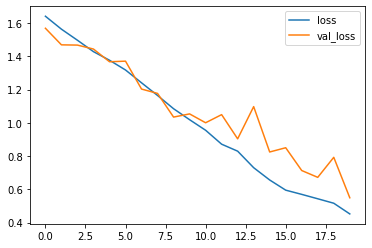

In [38]:
# Plot the fitting between training and actual
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

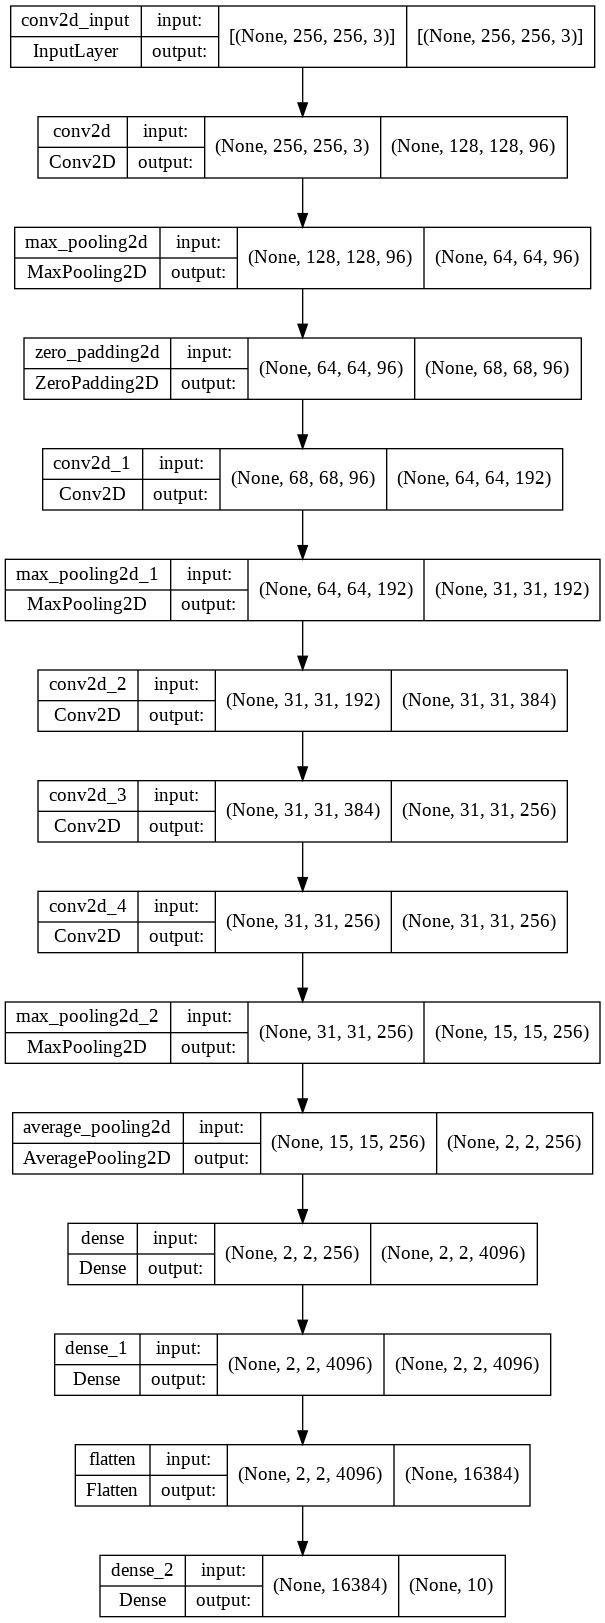

In [39]:
# Shows a visual representation of all layers
tf.keras.utils.plot_model(model,
           show_shapes=True,
           rankdir='TB',
           to_file='JANet.png')